**1. Import necessary library**

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**2.Read data**

In [2]:
dataset_path = './Housing.csv'
df = pd.read_csv(dataset_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**3.EDA**


**Data overview**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.dtypes.value_counts()

object    7
int64     6
Name: count, dtype: int64

+ No missing data
+ Have so much object data type 
=> have to convert it later

**Check Missing data**

C:\Users\mikeethanh\AppData\Local\Temp\ipykernel_1800\1912247546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x = notnull_count.index, y = notnull_count.values, palette='viridis')


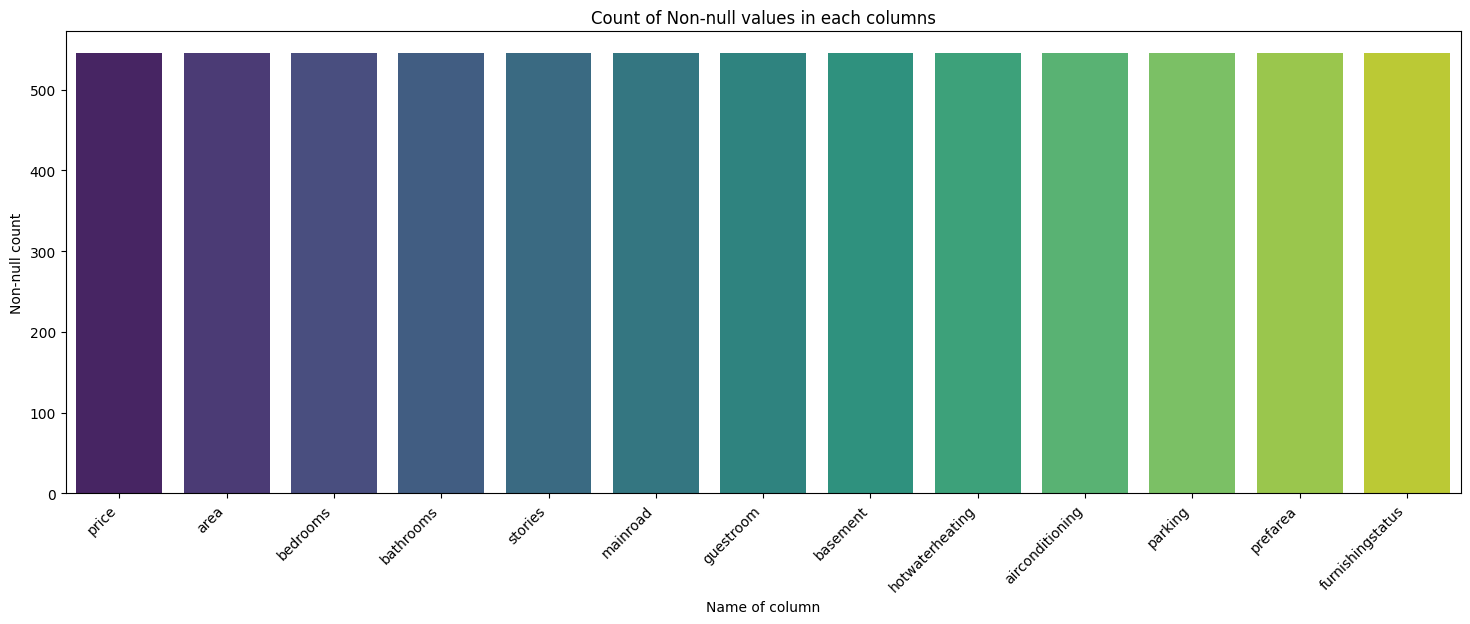

In [6]:
plt.figure(figsize=(18,6))
notnull_count = df.notnull().sum().sort_values(ascending=True)

fig = sns.barplot(x = notnull_count.index, y = notnull_count.values, palette='viridis')
plt.xticks(rotation=45, ha='right')

plt.xlabel("Name of column")
plt.ylabel("Non-null count")
plt.title("Count of Non-null values in each columns")
plt.show()


**Univariate Analysis**

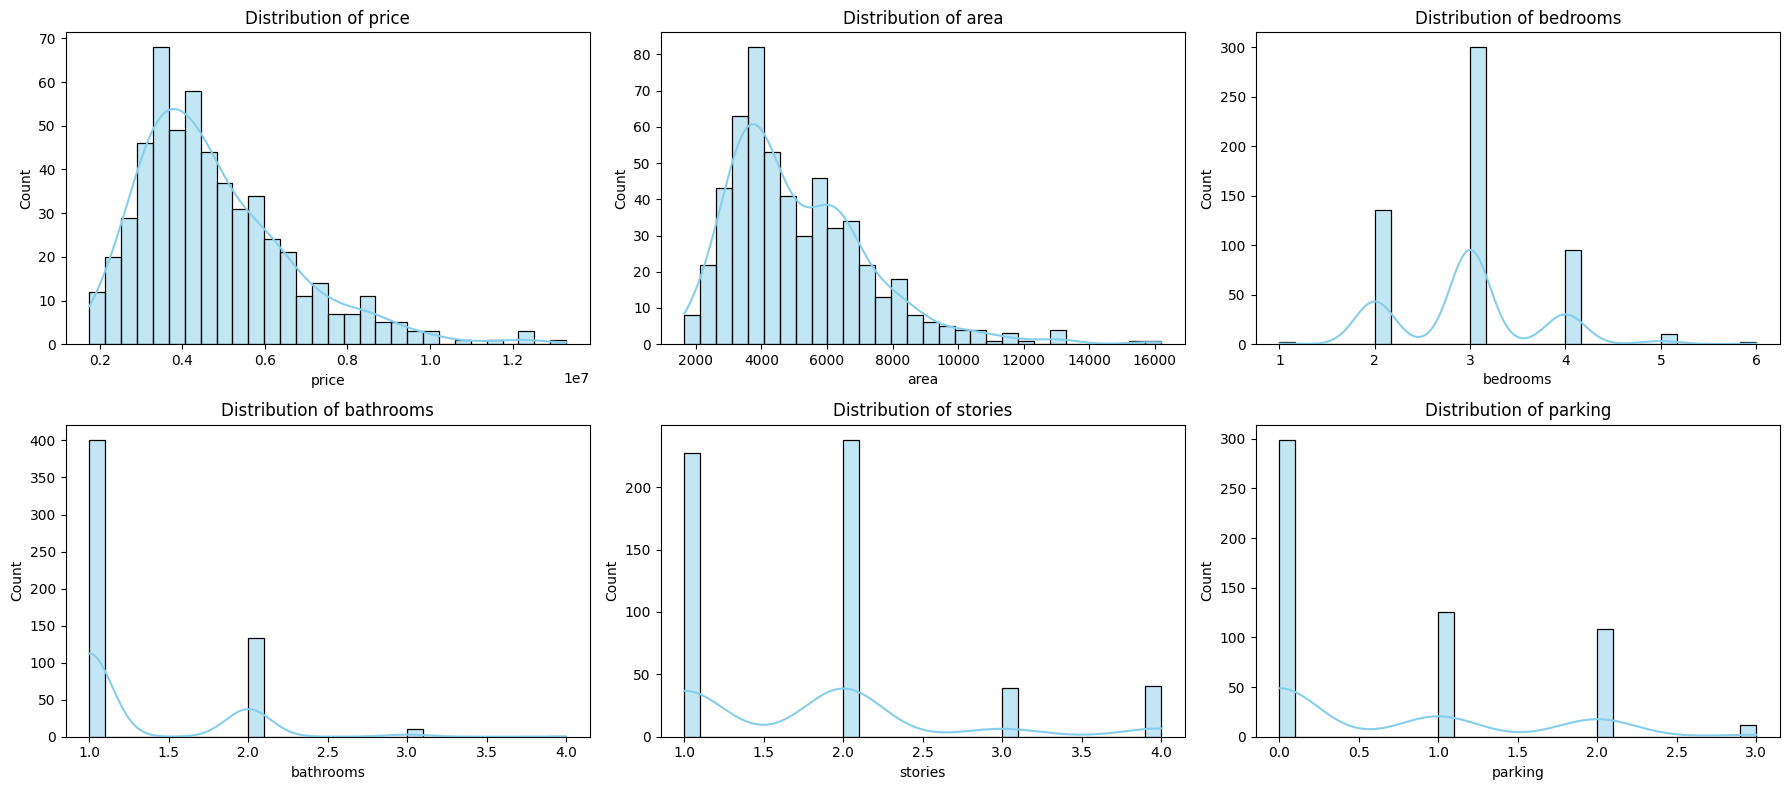

In [7]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns  

n_cols = 3  
n_rows = (len(num_cols) + n_cols - 1) // n_cols  

plt.figure(figsize=(6 * n_cols, 4 * n_rows))  

for i, col in enumerate(num_cols, 1):  
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [8]:
df['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

<Axes: xlabel='area'>

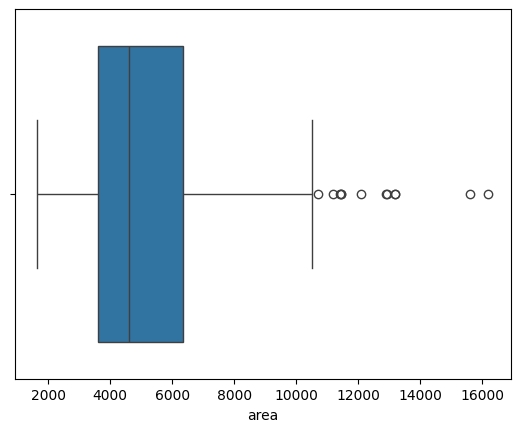

In [9]:
sns.boxplot(x=df['area'])


In [10]:
df['area'].skew()

np.float64(1.321188343153483)

In [11]:
col = 'area'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(f"Outlier '{col}': {len(outliers)}")

display(outliers)


Outlier 'area': 12


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


+ "area" column have right skew problem and 12 sample is outlier 
+ we have so many solution to solve this problem
=> we can convert to log or sqrt , skew values is 1.3 , medium skew so i wil chose sqrt

**Categorical**

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns  
for col in cat_cols:
    print(f"\n==== {col} ====")
    print(df[col].value_counts())


==== mainroad ====
mainroad
yes    468
no      77
Name: count, dtype: int64

==== guestroom ====
guestroom
no     448
yes     97
Name: count, dtype: int64

==== basement ====
basement
no     354
yes    191
Name: count, dtype: int64

==== hotwaterheating ====
hotwaterheating
no     520
yes     25
Name: count, dtype: int64

==== airconditioning ====
airconditioning
no     373
yes    172
Name: count, dtype: int64

==== prefarea ====
prefarea
no     417
yes    128
Name: count, dtype: int64

==== furnishingstatus ====
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


<Axes: title={'center': 'No. of home by furnishingstatus '}, xlabel='furnishingstatus ', ylabel='Count'>

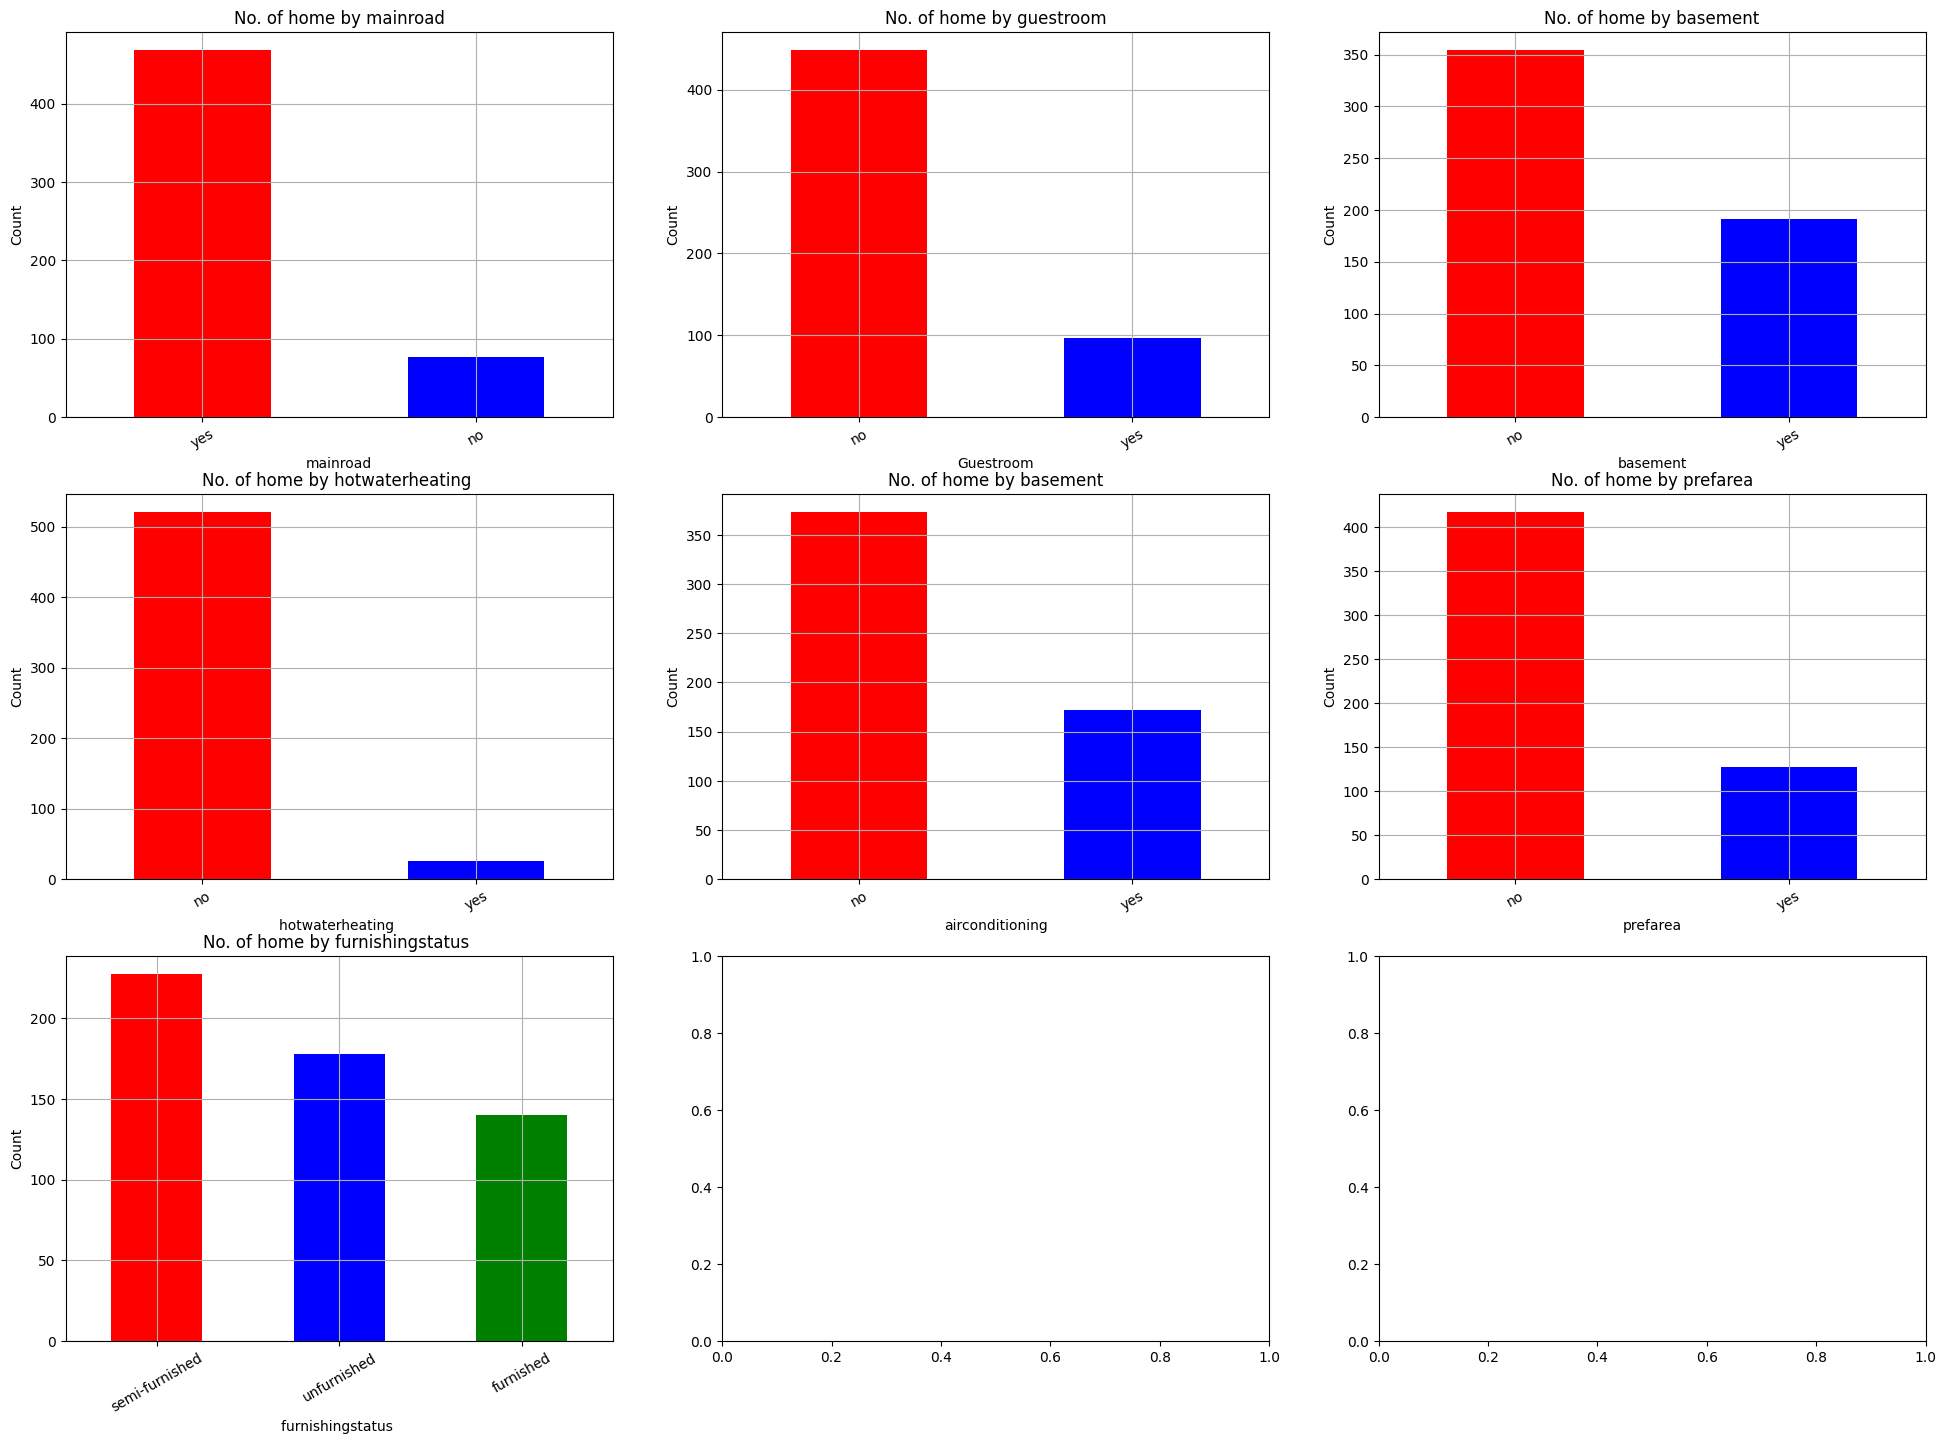

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 17))

df['mainroad'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['red', 'blue'], title='No. of home by mainroad', xlabel='mainroad', ylabel='Count', rot=30, grid=True)
df['guestroom'].value_counts().plot(kind='bar', ax=axes[0,1], color=['red', 'blue'], title='No. of home by guestroom', xlabel='Guestroom', ylabel='Count', rot=30, grid=True)
df['basement'].value_counts().plot(kind='bar', ax=axes[0,2], color=['red', 'blue'], title='No. of home by basement', xlabel='basement', ylabel='Count', rot=30, grid=True)
df['hotwaterheating'].value_counts().plot(kind='bar', ax=axes[1,0], color=['red', 'blue'], title='No. of home by hotwaterheating ', xlabel='hotwaterheating ', ylabel='Count', rot=30, grid=True)
df['airconditioning'].value_counts().plot(kind='bar', ax=axes[1,1], color=['red', 'blue'], title='No. of home by basement', xlabel='airconditioning', ylabel='Count', rot=30, grid=True)
df['prefarea'].value_counts().plot(kind='bar', ax=axes[1,2], color=['red', 'blue'], title='No. of home by prefarea', xlabel='prefarea', ylabel='Count', rot=30, grid=True)
df['furnishingstatus'].value_counts().plot(kind='bar', ax=axes[2,0], color=['red', 'blue','green'], title='No. of home by furnishingstatus ', xlabel='furnishingstatus ', ylabel='Count', rot=30, grid=True)



**Multivariate Analysis**

**Correlation between price and areas, bathroom, bedrooms, stories, parking**

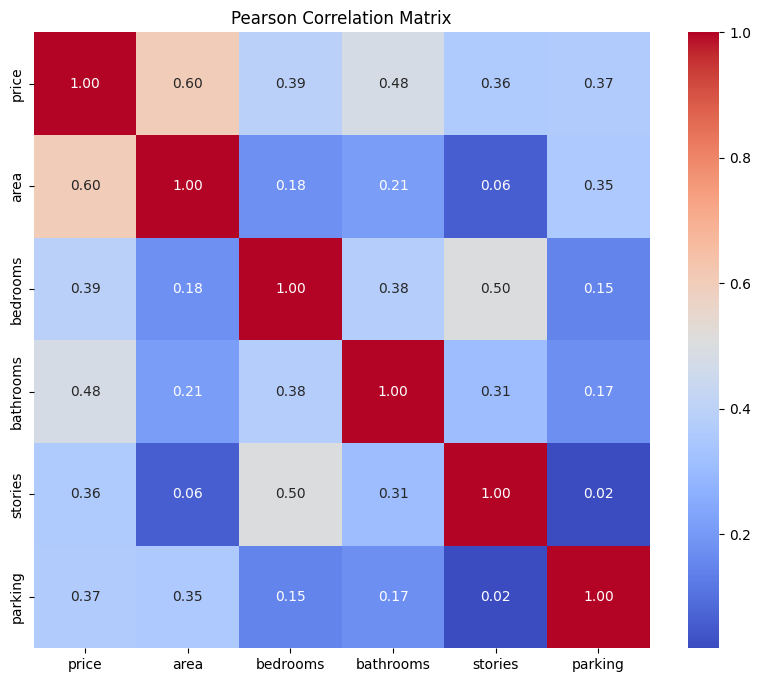

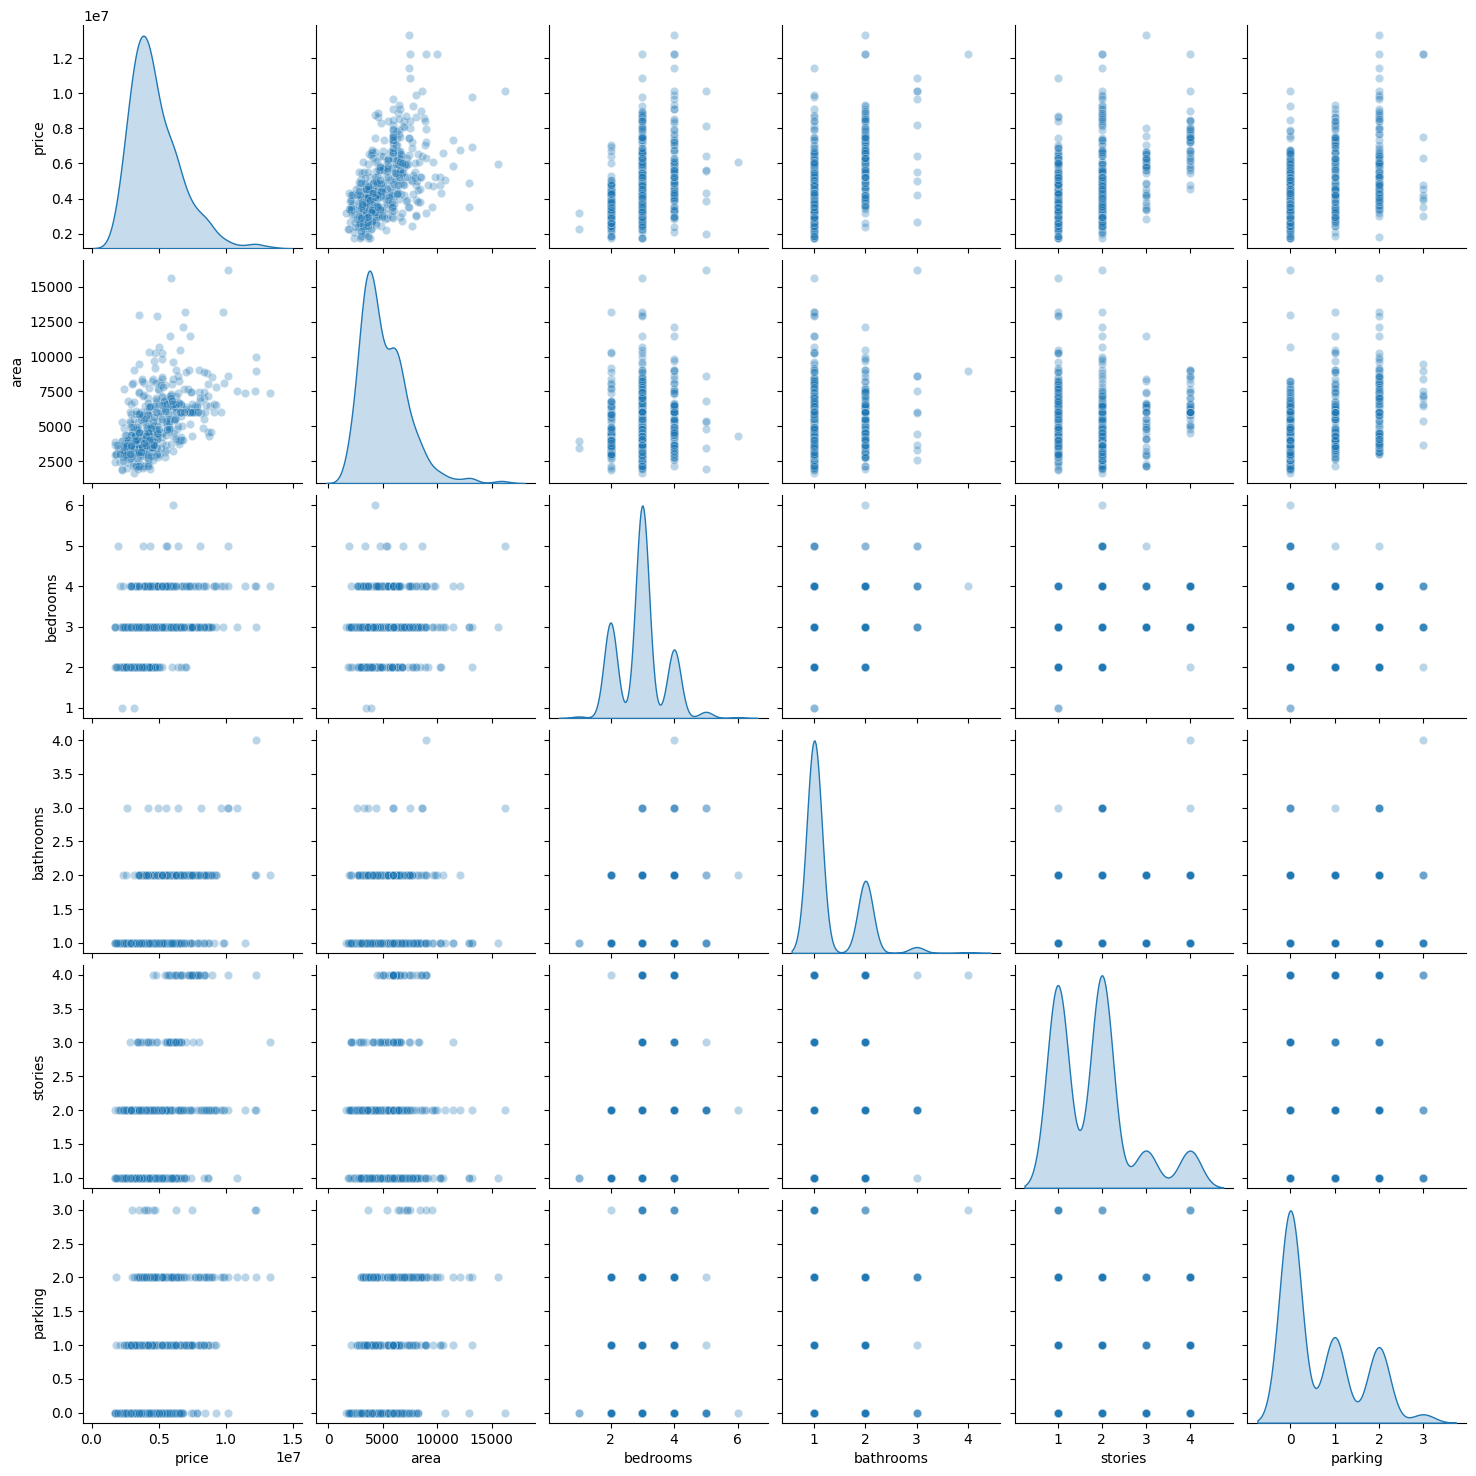

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix'); plt.show()

sns.pairplot(df[num_cols].sample(500), diag_kind='kde', plot_kws={'alpha':0.3})
plt.show()


+ the correlation between number categorical and prices so good , i dont need to do anything

**correlation between categorical and prices**

f:\Apps\anaconda3\envs\test\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\Apps\anaconda3\envs\test\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\Apps\anaconda3\envs\test\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


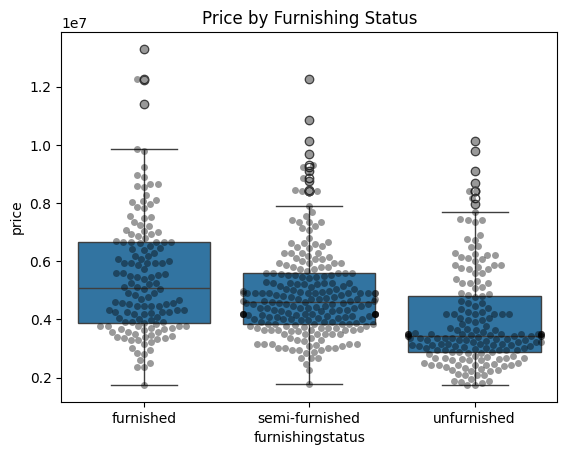

In [16]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
sns.swarmplot(x='furnishingstatus', y='price', data=df, color='k', alpha=0.4)
plt.title('Price by Furnishing Status'); plt.show()


f:\Apps\anaconda3\envs\test\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\Apps\anaconda3\envs\test\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


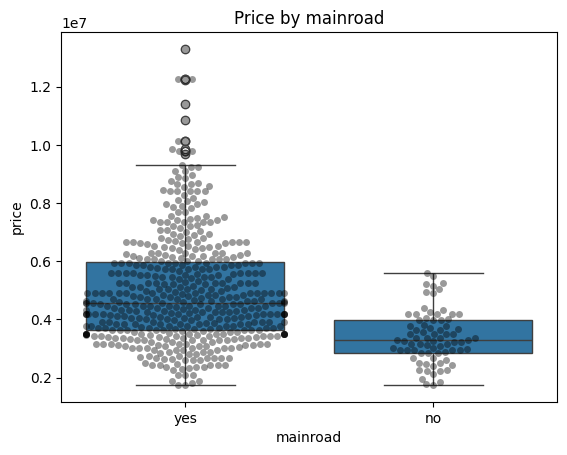

In [17]:
sns.boxplot(x='mainroad', y='price', data=df)
sns.swarmplot(x='mainroad', y='price', data=df, color='k', alpha=0.4)
plt.title('Price by mainroad'); plt.show()


**4.Data preprocessing**

+ Convert columns areas to sqrt=> solve skew problem , give them normal distribution , and handle outlier

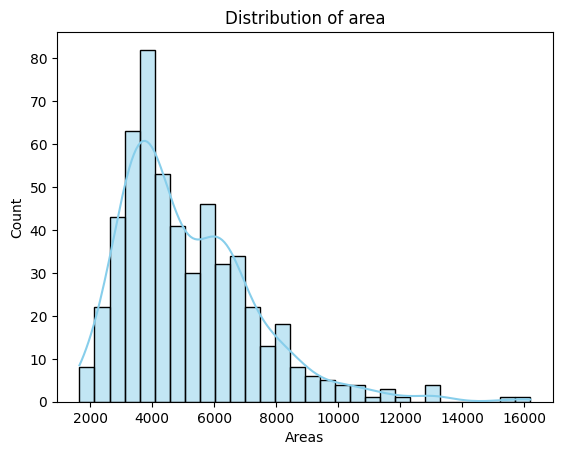

In [18]:
sns.histplot(df['area'], kde=True, bins=30, color='skyblue')
plt.title(f'Distribution of area')
plt.xlabel('Areas')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='area'>

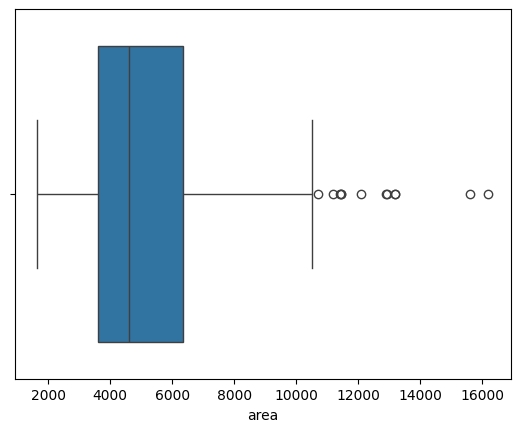

In [19]:
sns.boxplot(x=df['area'])

In [20]:
df_sqrt = df
df_sqrt['area'] = np.sqrt(df['area'].clip(lower=0))

In [21]:
df_sqrt['area'].describe()

count    545.000000
mean      70.331569
std       14.296388
min       40.620192
25%       60.000000
50%       67.823300
75%       79.749608
max      127.279221
Name: area, dtype: float64

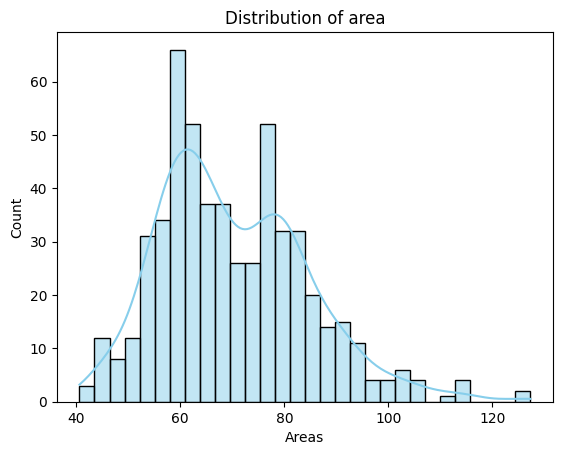

In [22]:
sns.histplot(df['area'], kde=True, bins=30, color='skyblue')
plt.title(f'Distribution of area')
plt.xlabel('Areas')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='area'>

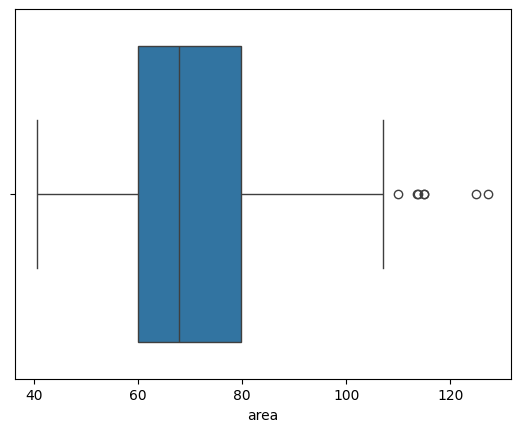

In [23]:
sns.boxplot(x=df['area'])

In [25]:
col = 'area'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(f"Outlier '{col}': {len(outliers)}")

display(outliers)

Outlier 'area': 7


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,127.279221,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,114.891253,3,1,2,yes,no,yes,no,yes,2,yes,furnished
66,6930000,114.891253,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,109.954536,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,124.899960,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
211,4900000,113.578167,3,1,1,yes,no,no,no,no,2,no,furnished
403,3500000,113.771701,3,1,1,yes,no,no,no,no,0,no,unfurnished


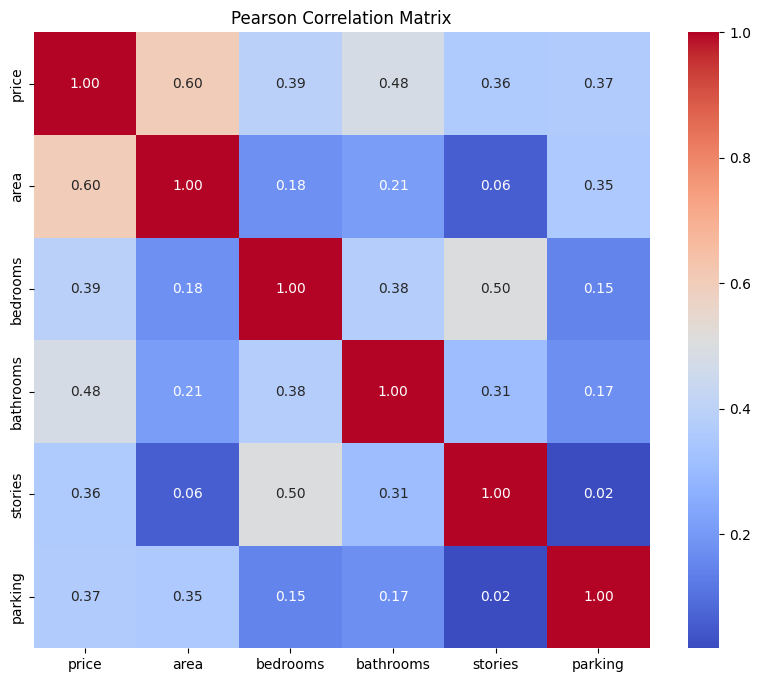

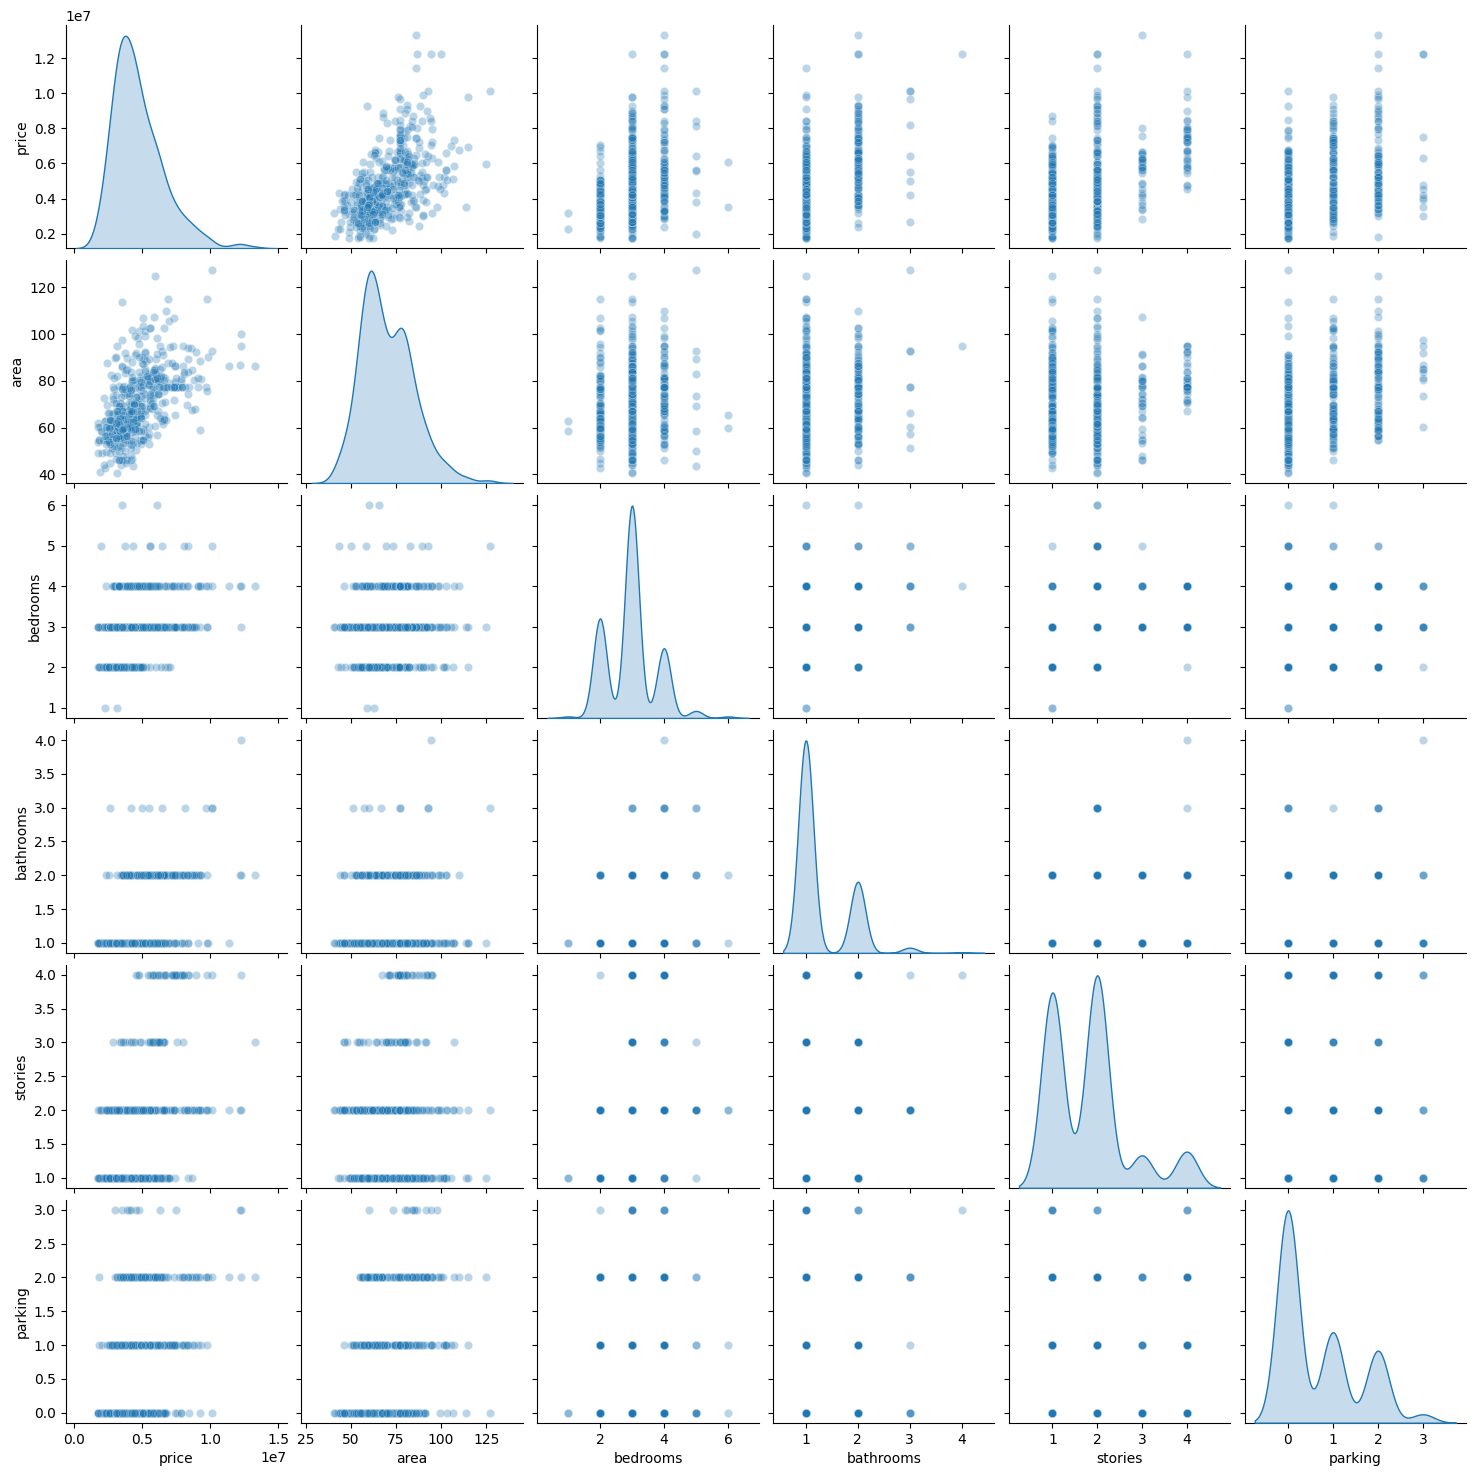

In [26]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix'); plt.show()

sns.pairplot(df[num_cols].sample(500), diag_kind='kde', plot_kws={'alpha':0.3})
plt.show()

**Handle categorial Data**
+ To perform any computation , we need to convert values in dataset to numeric form. Some columns in the dataset have Object datatype, so we need to convert it to numerical

In [27]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
print(cat_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [28]:
ordinal_encoder = OrdinalEncoder ()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[cat_cols])
encoded_categorical_df = pd. DataFrame(encoded_categorical_cols ,columns = cat_cols)
numerical_df = df.drop ( cat_cols , axis =1)
encoded_df = pd.concat ([ numerical_df , encoded_categorical_df ] , axis =1)

In [29]:
ordinal_encoder = OrdinalEncoder ()
encoded_categorical_cols = ordinal_encoder.fit_transform(df_sqrt[cat_cols])
encoded_categorical_df = pd. DataFrame(encoded_categorical_cols ,columns = cat_cols)
numerical_df = df_sqrt.drop ( cat_cols , axis =1)
encoded_df_sqrt = pd.concat ([ numerical_df , encoded_categorical_df ] , axis =1)

In [30]:
encoded_df 

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,86.139422,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,94.657277,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,99.799800,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,86.602540,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,86.139422,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,54.772256,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,48.989795,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,60.166436,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,53.944416,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
encoded_df_sqrt

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,86.139422,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,94.657277,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,99.799800,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,86.602540,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,86.139422,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,54.772256,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,48.989795,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,60.166436,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,53.944416,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Normalization**
I use z_score to normalization

In [32]:
norm = StandardScaler()
df_arr_sqrt = norm.fit_transform(encoded_df)
df_arr_sqrt

array([[ 4.56636513,  1.10673934,  1.40341936, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.70309135,  1.40341936, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.06312966,  0.04727831, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.71168126, -1.30886273, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.1472973 ,  0.04727831, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.57992341,  0.04727831, ..., -0.67906259,
        -0.55403469,  1.22296203]])

In [33]:
norm = StandardScaler()
df_arr = norm.fit_transform(encoded_df)
df_arr

array([[ 4.56636513,  1.10673934,  1.40341936, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.70309135,  1.40341936, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.06312966,  0.04727831, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.71168126, -1.30886273, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.1472973 ,  0.04727831, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.57992341,  0.04727831, ..., -0.67906259,
        -0.55403469,  1.22296203]])

In [35]:
X, y = df_arr[:, 1:], df_arr[:, 0]


In [36]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state= random_state, shuffle= is_shuffle)

**Modeling**
+ Conventional ML methods for regression:
    + Regression model: Decision Tree, AdaBoost, Gradient Boost
    + Metrics: MSE, MAE, R2_score

In [37]:
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'AdaBoost': AdaBoostRegressor(random_state=1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)

    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)
    
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"\n{name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(model.get_params())   
    print("R2 trên tập train:", r2_score(y_train, y_train_pred))
    print("R2 trên tập test :", r2_score(y_val, y_pred))



Decision Tree:
  MSE: 0.72
  MAE: 0.59
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 1, 'splitter': 'best'}
R2 trên tập train: 0.9999928417404832
R2 trên tập test : 0.3784121063088747

AdaBoost:
  MSE: 0.56
  MAE: 0.56
{'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50, 'random_state': 1}
R2 trên tập train: 0.6732812065126255
R2 trên tập test : 0.5196033486621491

Gradient Boosting:
  MSE: 0.40
  MAE: 0.45
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'r

+ **Overlook at R2 score, Decision Tree have overfitting with 0.99 in train and 0.37 in test dataset**
+ **AdaBoost - underfiting with 0.40 in train and 0.45 in test**
+ **Gradient Boosting - slightly overfitting with 0.867 in traing ansd 0.66 in test , so i will be finetuning this algrothrim**
+ **Random Forest - Slight overfitting with 0.94 in train and 0.67 in test, i will finetuning this algrothrim**


**Gradient Boosting: have some important hyperparamater: n_estimator, max_depth, min_samples_leaf, learning rate. In Default, we have learning rate = 0.01, max_depth = 3 , ccp_alpha = 0.0, min_sample_leaf = 1** 

In [44]:
model = GradientBoostingRegressor(random_state=1)

param_distributions = {
    'n_estimators': [200, 300, 400, 600, 800, 1000],
    'learning_rate': [0.05, 0.02, 0.01],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [2,3, 5, 10,20],
    'subsample':     [0.7, 0.8, 0.9],
    'max_features':  ['sqrt', 0.6, 0.8]
}


search = GridSearchCV(
    estimator=model,
    param_grid=param_distributions,
    scoring='r2'
)
search.fit(X_train, y_train)

print(f"Best Params for {name}: {search.best_params_}")
print(f"Best R2 Score: {search.best_score_}\n")

y_pred = search.best_estimator_.predict(X_val)
y_train_pred =  search.best_estimator_.predict(X_train)
print("Train R2 score:", r2_score(y_train, y_train_pred))
print("Test R2 score:", r2_score(y_val, y_pred))

Best Params for Random Forest: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 400, 'subsample': 0.8}
Best R2 Score: 0.604739347836804

Train R2 score: 0.8441948868576921
Test R2 score: 0.7004065263968292


In [29]:
print("Best model object:", search.best_estimator_)


Best model object: GradientBoostingRegressor(learning_rate=0.01, max_depth=2, random_state=1)


In [45]:
gradient_boost = GradientBoostingRegressor(random_state=1, n_estimators=400, subsample= 0.8, min_samples_leaf=3, max_features= 'sqrt', max_depth= 5, learning_rate= 0.01)
gradient_boost.fit(X_train, y_train)
y_pred = gradient_boost.predict(X_val)
y_train_pred = gradient_boost.predict(X_train)

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2  = r2_score(y_val, y_pred)
    
results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}
print(f"\nGradient boosting:")
print(f"  MSE: {mse:.2f}")
print(f"  MAE: {mae:.2f}")
print("R2 trên tập train:", r2_score(y_train, y_train_pred))
print("R2 trên tập test :", r2_score(y_val, y_pred))



Gradient boosting:
  MSE: 0.35
  MAE: 0.43
R2 trên tập train: 0.8441948868576921
R2 trên tập test : 0.7004065263968292


**Save the model, scaler, encoder**

In [46]:
import pickle 
with open("gradient_boost.pkl", "wb") as model_files:
    pickle.dump(gradient_boost, model_files)

with open("ordinal_encoder.pkl", "wb") as f:
    pickle.dump(ordinal_encoder, f)

with open("norm.pkl", "wb") as f:
    pickle.dump(norm, f)